<a href="https://colab.research.google.com/github/bleupoudre/ML/blob/main/ml1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classif 

In [17]:
# import datasets 
from sklearn.datasets import fetch_openml

In [18]:
# mnist dataset
mnist = fetch_openml("mnist_784", as_frame = False)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [19]:
X, y = mnist.data, mnist.target 

In [22]:
X.shape

(70000, 784)

In [23]:
import matplotlib.pyplot as plt

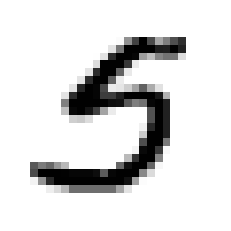

In [26]:
# plot an image function

def plot_image(image_data):
  image = image_data.reshape(28,28)
  plt.imshow(image, cmap="binary")
  plt.axis('off')

some_digit = X[699]
plot_image(some_digit)
plt.show()

In [27]:
y[699]

'5'

In [28]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Binary classif 

let's simplify the problem a bit
first we will try to build a classifier that recognizes the number 5. so a binary classifier that will distinguish 5 or non-5

In [29]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [30]:
from sklearn.linear_model import SGDClassifier

In [31]:
# initiate the classifier
sgd_classifier = SGDClassifier(random_state=42)

In [32]:
# train the classifier 
sgd_classifier.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [35]:
# test by doing a prediction on the digit that we visualized before 
sgd_classifier.predict([some_digit])

array([ True])

In [36]:
# performance measures 

from sklearn.model_selection import cross_val_score

In [37]:
cross_val_score(sgd_classifier, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [38]:
from sklearn.model_selection import cross_val_predict

In [39]:
y_train_pred = cross_val_predict (
    sgd_classifier,
    X_train,
    y_train_5,
    cv=3
)

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
cm = confusion_matrix(y_train_5, y_train_pred)

In [42]:
cm

array([[53892,   687],
       [ 1891,  3530]])

In [44]:
from sklearn.metrics import precision_score, recall_score

In [45]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [46]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [47]:
from sklearn.metrics import f1_score

In [48]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846